Convolutional neural network (CNN)
• Use any dataset of plant disease and design a plant disease detection system using CNN.

• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Build the model
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 17s 10ms/step - loss: 0.4618 - accuracy: 0.8343 - val_loss: 0.3593 - val_accuracy: 0.8708
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3104 - accuracy: 0.8870 - val_loss: 0.2980 - val_accuracy: 0.8916
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2617 - accuracy: 0.9028 - val_loss: 0.2930 - val_accuracy: 0.8920
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2297 - accuracy: 0.9157 - val_loss: 0.2614 - val_accuracy: 0.9062
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2031 - accuracy: 0.9247 - val_loss: 0.2571 - val_accuracy: 0.9052
Epoch 6/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1785 - accuracy: 0.9336 - val_loss: 0.2776 - val_accuracy: 0.9005
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1578 - accuracy: 0.9406 - val_loss: 0.2549

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3015 - accuracy: 0.9099
Test accuracy: 0.9099


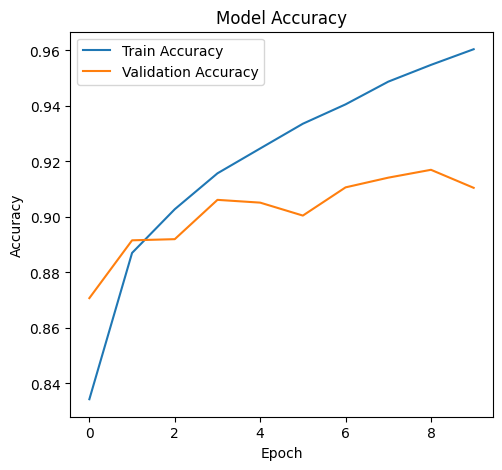

In [9]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

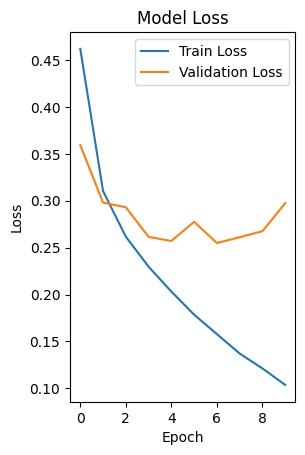

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [11]:
# Predict on test images
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 101ms/step


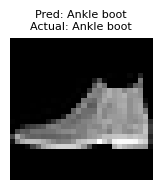

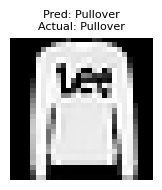

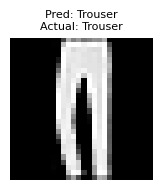

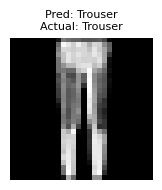

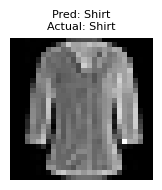

In [12]:
# Show predictions for first 5 test images
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i]]}", fontsize=8)
    plt.axis('off')
    plt.tight_layout()
    plt.show()